In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

8 matches


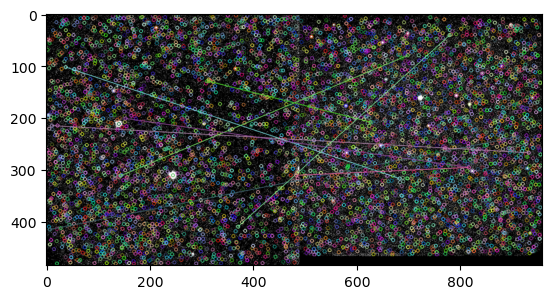

In [72]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
sift = cv2.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [73]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape[0:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
print(dst)

[[[192.16273 321.47797]]

 [[100.84586 349.51154]]

 [[202.08556 356.4042 ]]

 [[ 83.76451 154.07246]]]


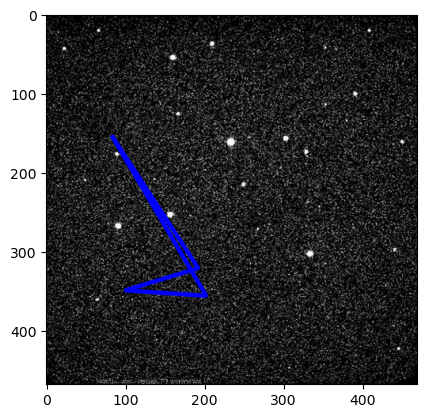

In [74]:
img2 = cv2.polylines(img2,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))